# CIS 441 Project 1G

### Import essential packages

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical

import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys

%matplotlib inline

Using TensorFlow backend.


### Prepare data

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Reshape all train_set_x_orig, train_set_y, test_set_x_orig, test_set_y into right shape. See instruction for detials.

In [4]:
#train_set_x_orig = np.reshape(train_set_x_orig, np.prod(train_set_x_orig.shape))
#test_set_x_orig = np.reshape(test_set_x_orig, np.prod(test_set_x_orig.shape))

train_set_y = np.reshape(train_set_y, (1, train_set_y.size))
test_set_y = np.reshape(test_set_y, (1, test_set_y.size))

Turn y_train_binary and y_test_binary into categorical

In [5]:
y_train_binary = to_categorical(train_set_y)
y_test_binary = to_categorical(test_set_y)

Visualize data ( train_set_x_orig )

y = [1], it's a 'cat' picture.


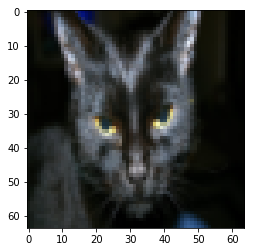

In [6]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


Convert train_set_x_orig and test_set_x_orig into "float32" and map their values into range[0,1]. Store final values into X_train and X_test with respect.

In [7]:
X_train = np.float32(train_set_x_orig)/255
X_test = np.float32(test_set_x_orig)/255

### Build model 

In [8]:
model = Sequential()
model.add(Convolution2D(32, (4,4), activation="relu", input_shape=(64, 64, 3)))
model.add(Convolution2D(32, (4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Compile model

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train model

In [10]:
model.fit(X_train, y_train_binary[0], 
          batch_size=64, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
209/209 [==============================] - 3s 16ms/step - loss: 0.6764 - acc: 0.6268
Epoch 2/10
209/209 [==============================] - 3s 12ms/step - loss: 0.6106 - acc: 0.6555
Epoch 3/10
209/209 [==============================] - 3s 12ms/step - loss: 0.5088 - acc: 0.6555
Epoch 4/10
209/209 [==============================] - 3s 12ms/step - loss: 0.4719 - acc: 0.6555
Epoch 5/10
209/209 [==============================] - 3s 12ms/step - loss: 0.4325 - acc: 0.6818
Epoch 6/10
209/209 [==============================] - 3s 13ms/step - loss: 0.3925 - acc: 0.7919
Epoch 7/10
209/209 [==============================] - 3s 12ms/step - loss: 0.3880 - acc: 0.8182
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.3515 - acc: 0.8469
Epoch 9/10
209/209 [==============================] - 3s 12ms/step - loss: 0.3006 - acc: 0.9019
Epoch 10/10
209/209 [==============================] - 3s 12ms/step - loss: 0.2637 - acc

Evaluate model

In [11]:
score = model.evaluate(X_test, y_test_binary[0], verbose=0)
print("The accuracy is:",score[1] )

The accuracy is: 0.8599999928474427


Make prediction using trained model with given data

In [13]:
pred = model.predict(X_test)

Visualize predicting result

In [14]:
res = []
for p in pred:
    temp = 'is' if p[1]>p[0] else 'is not'
    res.append(temp)

y = 1, you prediction is: it is a cat


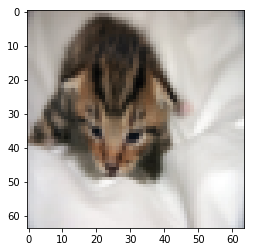

In [15]:
index = 1
plt.imshow(test_set_x_orig[index])
print ("y = " + str(test_set_y[0,index]) + ", you prediction is: it " + res[index] + ' a cat')

Display index of all mis-predicted pictures

In [15]:
pred_res= []
for p in pred:
    if p[0]<p[1]:
        pred_res.append(1)
    else:
        pred_res.append(0)
diff_index = []
for i in range(len(pred_res)):
    if pred_res[i] != test_set_y[0][i]:
        diff_index.append(i)
        

In [16]:
diff_index

[11, 13, 18, 19, 21, 30, 34, 41, 44]

Visualize

y = 1, you predicted is: it is a cat


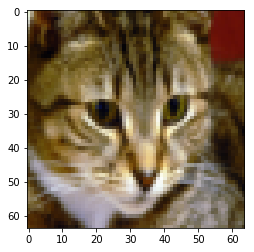

In [17]:
index = 15
plt.imshow(test_set_x_orig[index])
print ("y = " + str(test_set_y[0,index]) + ", you predicted is: it " + res[index] + ' a cat')